In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/clean_spain_2018.csv')
df_non_shared = df[df['Tipo_Inmueble'] != 'Habitacion_Compartida']
df.head()

,Key,Fecha_Encuentro,Host_Key,Tipo_Inmueble,Dormitorios,Capacidad,Min_Nights,Precio,CCAA,Provincia,Precio/Capacidad
0,16530939,2017-08-14,108733091,Inmueble_Completo,7.0,13.0,2.0,115.0,La_Rioja,La_Rioja,8.846154
1,21897359,2018-04-05,41744662,Inmueble_Completo,0.0,5.0,2.0,72.0,La_Rioja,La_Rioja,14.400000
2,16169325,2017-08-14,98329255,Inmueble_Completo,0.0,16.0,2.0,174.0,La_Rioja,La_Rioja,10.875000
3,14032775,2017-08-14,71144354,Inmueble_Completo,0.0,5.0,1.0,81.0,La_Rioja,La_Rioja,16.200000
4,18608735,2017-08-14,129246172,Inmueble_Completo,4.0,10.0,2.0,215.0,La_Rioja,La_Rioja,21.500000


In [50]:
media_precio = df_non_shared['Precio'].mean()
df_non_shared.groupby(by = 'CCAA')['Precio'].describe()

,count,mean,std,min,25%,50%,75%,max
CCAA,,,,,,,,
Andalucia,19870.0,84.369049,57.309050,15.0,48.0,70.0,102.00,368.0
Aragon,934.0,91.596360,60.808423,15.0,50.0,76.0,113.75,364.0
Asturias,1309.0,79.339190,54.763080,15.0,45.0,66.0,96.00,360.0
Cantabria,1190.0,88.328571,54.398636,15.0,54.0,75.0,107.75,360.0
Castilla_La_Mancha,1147.0,99.102877,73.698467,15.0,48.0,74.0,121.00,364.0
Castilla_Y_Leon,2178.0,93.162075,71.220284,15.0,44.0,72.0,119.75,367.0
Cataluña,21572.0,92.155618,66.003129,15.0,45.0,72.0,119.00,368.0
Ceuta_Y_Melilla,18.0,55.222222,26.726404,22.0,35.0,62.5,65.00,127.0
Comunidad_De_Madrid,10203.0,73.046653,50.997937,15.0,36.0,60.0,93.00,364.0


Estadísticas sobre precios

Text(83.73559425174366, 18.7, 'Media')

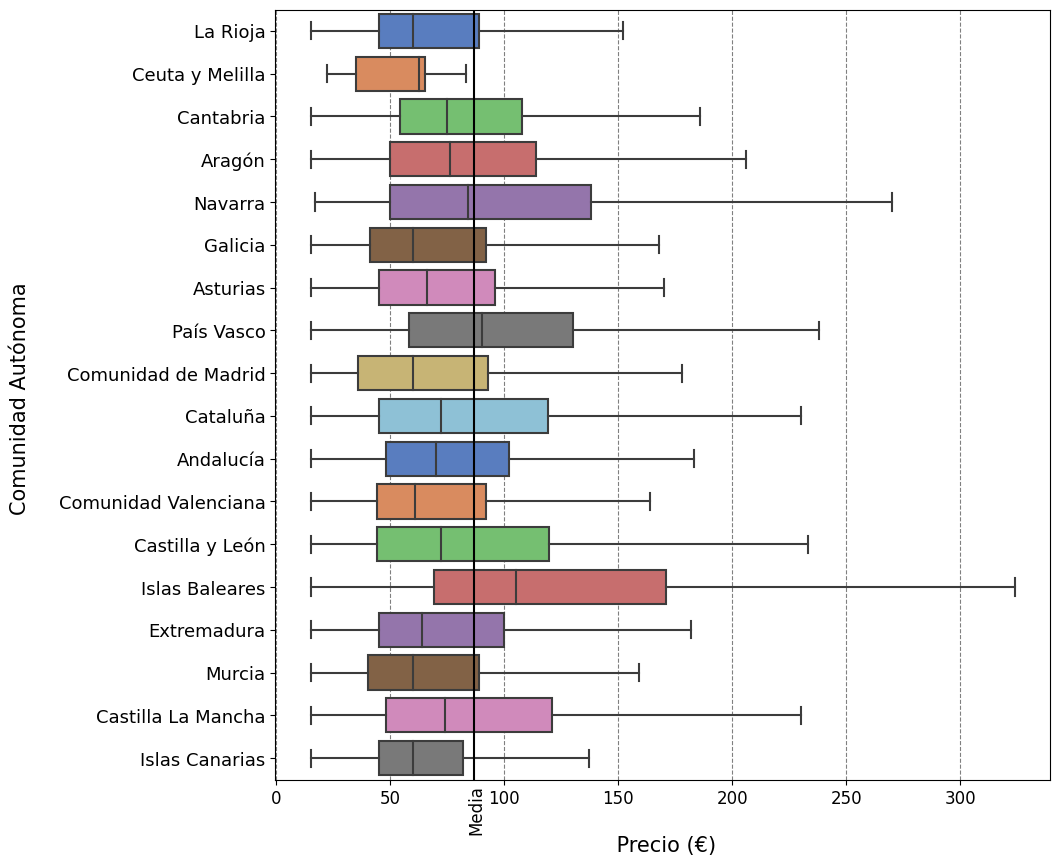

In [49]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

ax
sns.boxplot(data = df_non_shared, 
            x = 'Precio', 
            y = 'CCAA',
            palette = 'muted',
            showfliers = False)
ax.plot(np.array([media_precio,media_precio]),
                 ax.get_ylim(),
                 color = (0,0,0))

ax.set_yticklabels('La Rioja,Ceuta y Melilla,Cantabria,Aragón,Navarra,Galicia,Asturias,País Vasco,Comunidad de Madrid,Cataluña'.split(sep = ',')
                   +'Andalucía,Comunidad Valenciana,Castilla y León,Islas Baleares,Extremadura,Murcia,Castilla La Mancha,Islas Canarias'.split(sep = ','),
                    fontdict = {'fontsize' : 13})
plt.xticks(fontsize = 12)
ax.set_ylabel('Comunidad Autónoma \n', fontdict={'fontsize': 15})
ax.set_xlabel('\n Precio (€)',fontdict={'fontsize':15})
ax.text(x = media_precio -3, y = ax.get_ylim()[0] + 1.2, s = 'Media', fontdict={'rotation':90,'fontsize':12})

Estadísticas sobre densidad publicitaria

In [46]:
density_per_provinces = df['Provincia'].value_counts()
np.round(((density_per_provinces.values)/(density_per_provinces.values.sum()))*100, 2)

array([17.84, 12.05,  9.14,  6.17,  5.71,  5.47,  4.34,  4.31,  3.88,
        3.72,  2.78,  2.73,  1.53,  1.52,  1.39,  1.33,  1.22,  1.14,
        1.06,  1.05,  0.92,  0.87,  0.86,  0.72,  0.71,  0.55,  0.51,
        0.47,  0.43,  0.42,  0.41,  0.37,  0.37,  0.36,  0.33,  0.32,
        0.32,  0.3 ,  0.28,  0.27,  0.25,  0.24,  0.22,  0.21,  0.18,
        0.17,  0.17,  0.16,  0.12,  0.11,  0.02,  0.  ])

([<matplotlib.patches.Wedge at 0x29a5dc7e550>,
 [Text(0.7736357103590917, 0.7819768459853422, 'Cataluña'),
  Text(-0.7748301555187301, 0.8497871675300943, 'Andalucía'),
  Text(-1.0584957805522954, -0.2993103448813406, 'Comunidad de Madrid'),
  Text(-0.5915070831391107, -0.9274262076285431, 'Comunidad Valeniana'),
  Text(-0.02748178861629557, -1.0996566515483137, 'Islas Baleares'),
  Text(0.38109003030452887, -1.0318771190420366, 'Islas Canarias'),
  Text(0.6465442210728418, -0.8899329020759444, 'País Vasco'),
  Text(0.7930417721304699, -0.7622891496382223, 'Galicia'),
  Text(0.9091186752742292, -0.6192763795492533, 'Castilla y León'),
  Text(0.9809836084233616, -0.49766571110001223, 'Asturias'),
  Text(1.0224785373991643, -0.40563239584390465, 'Cantabria'),
  Text(1.053440435777914, -0.31664372450443273, 'Castilla La Mancha'),
  Text(1.0745137662074773, -0.23541488107301714, 'Aragón'),
  Text(1.0869756051915183, -0.16877213549200862, 'Murcia'),
  Text(1.0945626565243598, -0.10923639934

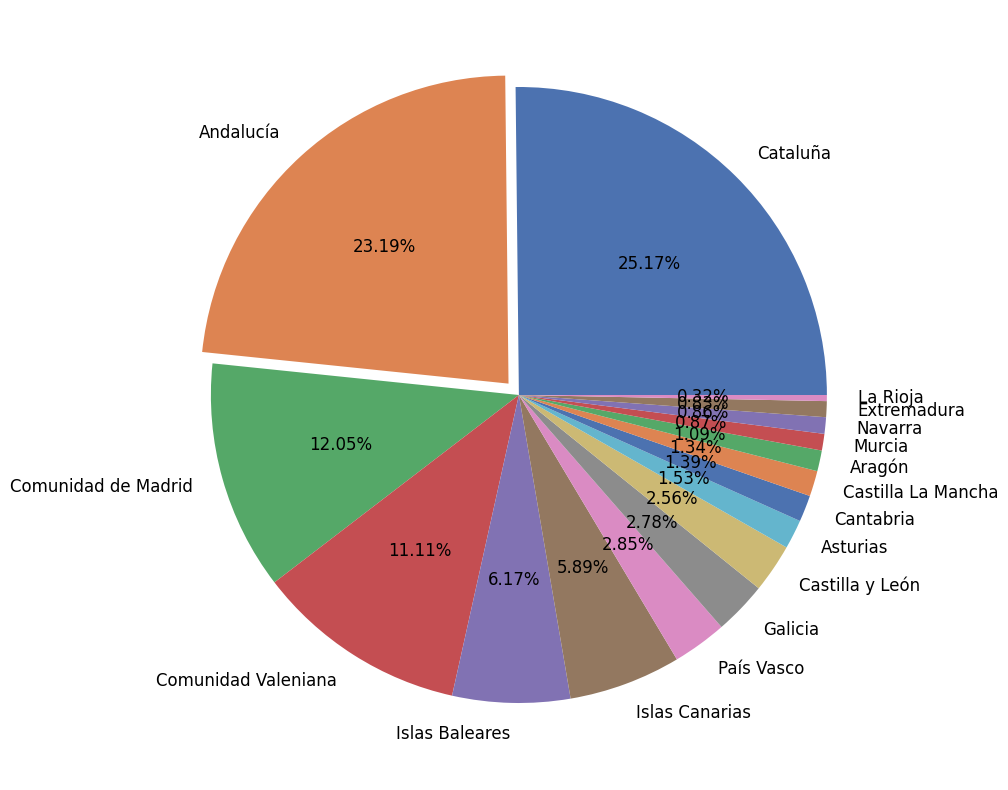

In [25]:
density_per_ccaa_data = df['CCAA'].value_counts()[0:-1]

plt.figure(figsize = (10,10))
plt.pie(x = density_per_ccaa_data.values, 
        labels = ['Cataluña', 'Andalucía', 'Comunidad de Madrid', 'Comunidad Valeniana', 'Islas Baleares', 'Islas Canarias', 'País Vasco', 'Galicia',
                  'Castilla y León', 'Asturias', 'Cantabria', 'Castilla La Mancha', 'Aragón', 'Murcia', 'Navarra', 'Extremadura', 'La Rioja'], 
        autopct='%1.2f%%',
        textprops= {'fontsize': 12},
        colors= sns.color_palette('deep'),
        explode= np.array([0] + [0.05]+ [0]*15))